In [122]:
from PIL import Image
import requests
from io import BytesIO
from folium import plugins
import folium
from PIL.ExifTags import TAGS, GPSTAGS
import base64
import io

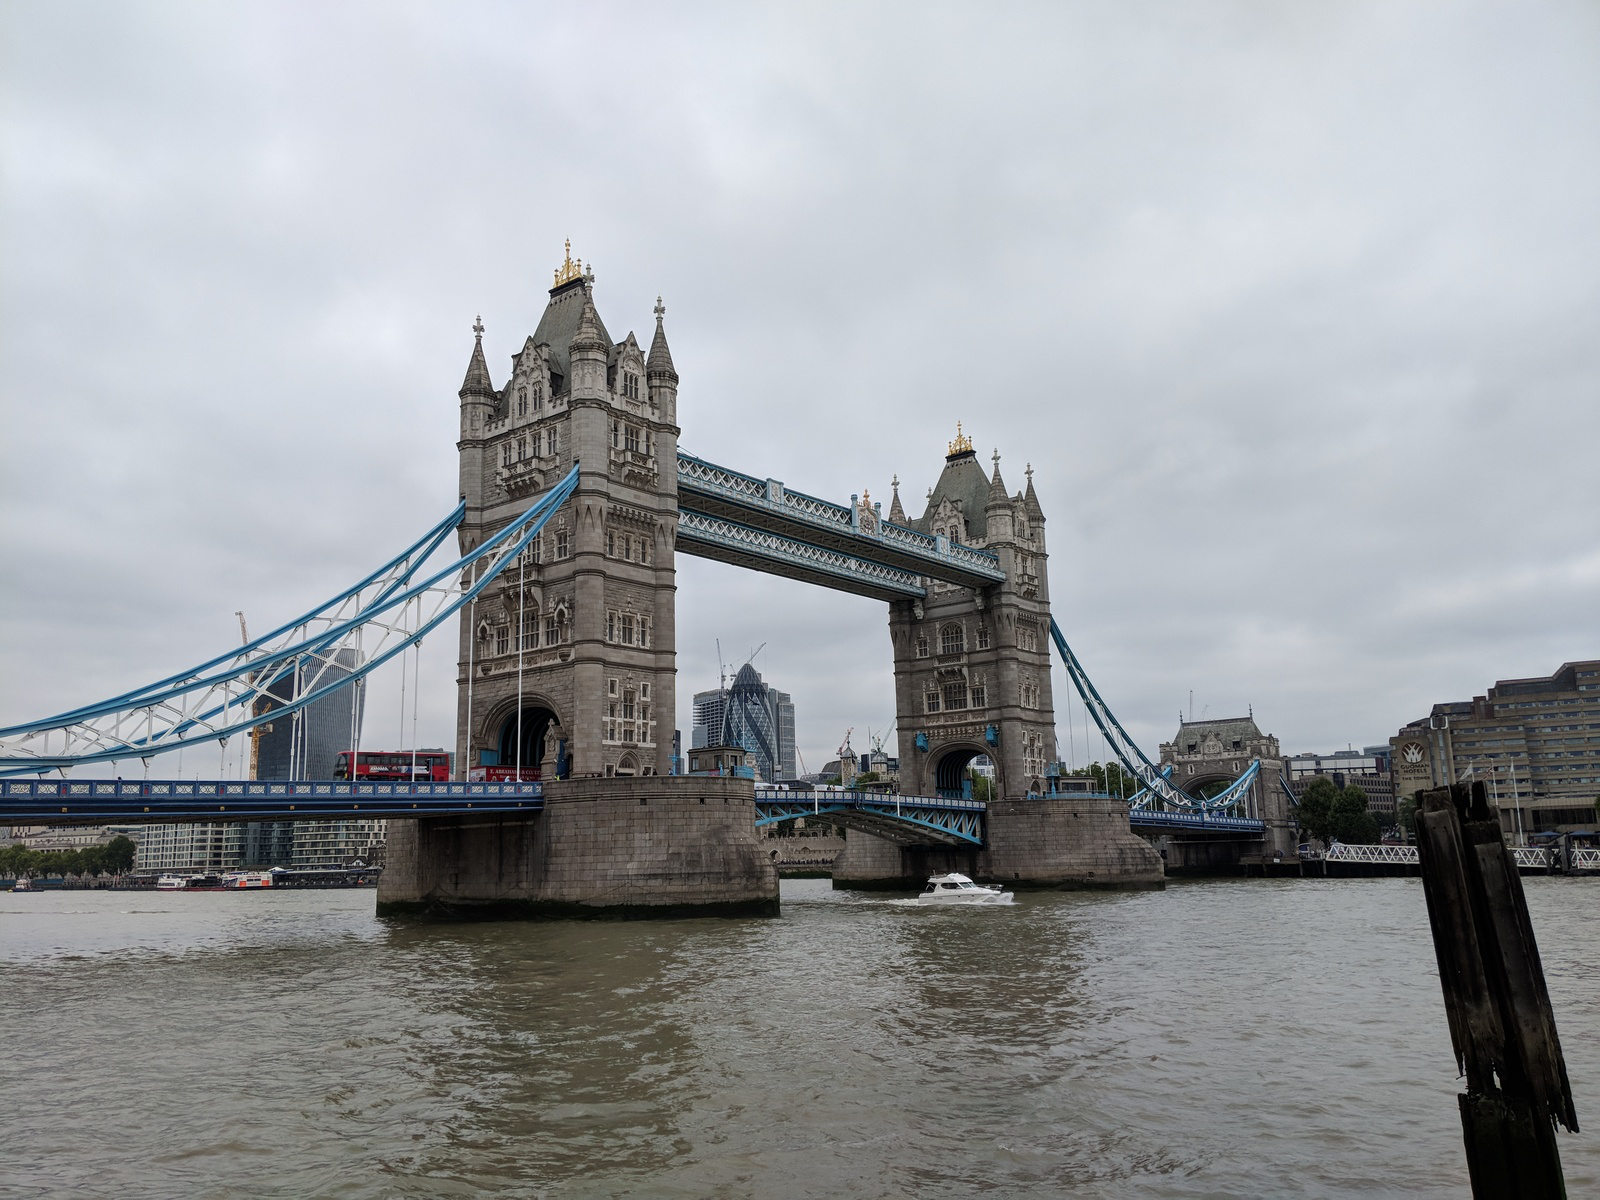

In [123]:
url="https://www.geoimgr.com/images/samples/england-london-bridge.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [124]:
buffer = io.BytesIO()
img.save(buffer, format='JPEG', quality=75)

In [125]:
info = image._getexif()
if info:
    for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        if decoded == "GPSInfo":
            gps_data = {}
            for t in value:
                sub_decoded = GPSTAGS.get(t, t)
                gps_data[sub_decoded] = value[t]

            exif_data[decoded] = gps_data
        else:
            exif_data[decoded] = value
            
            
if "GPSInfo" in exif_data:
        gps_info = exif_data["GPSInfo"]

        gps_latitude = _get_if_exist(gps_info, "GPSLatitude")
        gps_latitude_ref = _get_if_exist(gps_info, 'GPSLatitudeRef')
        gps_longitude = _get_if_exist(gps_info, 'GPSLongitude')
        gps_longitude_ref = _get_if_exist(gps_info, 'GPSLongitudeRef')


In [126]:
lat=gps_latitude[0]+gps_latitude[1]/60.0+gps_latitude[2]/3600.0
if gps_latitude_ref != "N":                     
    lat = 0 - lat
lon=gps_longitude[0]+gps_longitude[1]/60.0+gps_longitude[2]/3600.0
if gps_longitude_ref != "E":                     
    lon = 0 - lon   
print(lat,lon)

51.504105555555554 -0.074575


In [127]:
Latitude=53.227390
Longitude=-4.129263

In [128]:
m=folium.Map(location=[Latitude,Longitude],zoom_start=6, tiles='stamen terrain')

In [134]:
encoded = base64.b64encode(buffer.getbuffer()).decode()
html = '<img src="data:image/jpg;base64,{}">'.format
resolution, width, height = 75, 20, 20


In [139]:
iframe = folium.IFrame(html(encoded), width=632+20, height=420+20)

popup = folium.Popup(iframe, max_width=2650)

In [140]:
color='green'
folium.Marker(location=[lat,lon],
                      popup= popup,              
              icon=folium.Icon(icon ='default', color=color)).add_to(m)
m